In [1]:
import os
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torchvision import transforms

from google.colab import drive
drive.mount('/content/drive')

class MalariaDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

         # Convert image to float32 and add channel dimension
        image = torch.from_numpy(image).type(torch.float32)
        # Add a channel dimension if it's missing
        if image.dim() == 2:  # If image has only height and width
            image = image.unsqueeze(0)  # Add channel dimension at the beginning


        if self.transform:
            image = self.transform(image)

        return image, label

def process_malaria_images(drive_base_path):
    """
    Processes malaria cell images from a directory.

    Args:
        drive_base_path (str): Base path where images are stored.

    Returns:
        tuple: Processed images and their corresponding labels
    """
    parasitized_processed = []
    uninfected_processed = []

    # Paths to image directories
    parasitized_path = os.path.join(drive_base_path, 'Parasitized')
    uninfected_path = os.path.join(drive_base_path, 'Uninfected')

    target_size = (128, 128)

       # Process Parasitized images
    for filename in os.listdir(parasitized_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(parasitized_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            parasitized_processed.append(img_binary)

    # Process Uninfected images
    for filename in os.listdir(uninfected_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(uninfected_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            uninfected_processed.append(img_binary)


    # Create labels
    X = parasitized_processed + uninfected_processed
    y = [1] * len(parasitized_processed) + [0] * len(uninfected_processed)

    return X, y

def split_dataset(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """
    Split dataset into train, validation, and test sets.

    Args:
        X (list): Input images
        y (list): Labels
        train_ratio (float): Proportion of training data
        val_ratio (float): Proportion of validation data
        test_ratio (float): Proportion of test data

    Returns:
        tuple: Train, validation, and test sets with their corresponding labels
    """
    # First split off test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # Calculate validation proportion relative to train_val set
    val_prop = val_ratio / (1 - test_ratio)

    # Split remaining data into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_prop, random_state=42, stratify=y_train_val
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Base path to the folder containing cell images
drive_base_path = '/content/drive/My Drive/cell_images'

# Process images and get dataset
X, y = process_malaria_images(drive_base_path)

# Split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Print dataset sizes
print(f"Training set: {len(X_train)} images ({len(X_train)/len(X)*100:.2f}%)")
print(f"Validation set: {len(X_val)} images ({len(X_val)/len(X)*100:.2f}%)")
print(f"Test set: {len(X_test)} images ({len(X_test)/len(X)*100:.2f}%)")

# Create datasets with transforms
#transform = transforms.Compose([
 #   transforms.ToTensor(),
 #   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#])

train_dataset = MalariaDataset(X_train, y_train)
val_dataset = MalariaDataset(X_val, y_val)
test_dataset = MalariaDataset(X_test, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training set: 22046 images (80.00%)
Validation set: 2756 images (10.00%)
Test set: 2756 images (10.00%)


In [ ]:
#CELL 1
# Imports
import os
import torch
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset class for malaria cell images
class MalariaDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert image to float32 and add channel dimension
        image = torch.from_numpy(image).type(torch.float32)
        if image.dim() == 2:  # If image has only height and width
            image = image.unsqueeze(0)

        if self.transform:
            image = self.transform(image)

        return image, label

# Function to process malaria images
def process_malaria_images(drive_base_path):
    parasitized_processed = []
    uninfected_processed = []

    parasitized_path = os.path.join(drive_base_path, 'Parasitized')
    uninfected_path = os.path.join(drive_base_path, 'Uninfected')

    target_size = (128, 128)

    # Process Parasitized images
    for filename in os.listdir(parasitized_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(parasitized_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            parasitized_processed.append(img_binary)

    # Process Uninfected images
    for filename in os.listdir(uninfected_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(uninfected_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            _, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            uninfected_processed.append(img_binary)

    # Combine data and labels
    X = parasitized_processed + uninfected_processed
    y = [1] * len(parasitized_processed) + [0] * len(uninfected_processed)

    return X, y

# Base path for images
drive_base_path = '/content/drive/My Drive/cell_images'

# Process images
X, y = process_malaria_images(drive_base_path)

# Display a sample preprocessed image
plt.imshow(X[0], cmap='gray')
plt.title("Sample Preprocessed Image")
plt.axis("off")
plt.show()


Mounted at /content/drive


In [ ]:
#CELL 2
# Function to split the dataset
def split_dataset(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Split into train+val and test
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # Split train+val into train and val
    val_prop = val_ratio / (1 - test_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_prop, random_state=42, stratify=y_train_val
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

# Print dataset sizes
print(f"Training set: {len(X_train)} images ({len(X_train) / len(X) * 100:.2f}%)")
print(f"Validation set: {len(X_val)} images ({len(X_val) / len(X) * 100:.2f}%)")
print(f"Test set: {len(X_test)} images ({len(X_test) / len(X) * 100:.2f}%)")

# Create datasets
train_dataset = MalariaDataset(X_train, y_train)
val_dataset = MalariaDataset(X_val, y_val)
test_dataset = MalariaDataset(X_test, y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [2]:
#cell 3
import torch.nn as nn

class MalariaClassifier(nn.Module):
    def __init__(self):
        super(MalariaClassifier, self).__init__()

        self.features = nn.Sequential(  # Extract features using convolutional layers
            nn.Conv2d(3, 32, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),

            nn.Flatten()
        )

        # Calculate the size of the flattened output from the features
        # We use a dummy input with the appropriate shape to get the output size
        dummy_input = torch.randn(1, 3, 128, 128) #Assuming input image size of 128x128
        features_output_size = self.features(dummy_input).shape[1]

        self.classifier = nn.Sequential(  # Classify based on extracted features
            nn.Linear(features_output_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 2)
        )


    def forward(self, x):
        x = self.features(x) #Extract features
        x = self.classifier(x) #Classify features
        return x

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b7

class MalariaClassifier(nn.Module):
    def __init__(self):
        super(MalariaClassifier, self).__init__()

        # EfficientNet-B7 as the feature extractor
        base_model = efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(
            base_model.features,  # Use the EfficientNet feature layers
            nn.Dropout(0.5),      # Dropout after EfficientNet feature extraction
            nn.Flatten()          # Flatten the output for the dense layers
        )

        # Freeze the EfficientNet layers to prevent updating during training
        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Calculate the correct input size for BatchNorm1d
        dummy_input = torch.randn(1, 3, 128, 128)  # Assuming input image size of 128x128
        features_output_size = self.feature_extractor(dummy_input).shape[1]

        # Define the classifier layers
        self.classifier = nn.Sequential(
            nn.BatchNorm1d(features_output_size),  # Use calculated input size
            nn.Linear(features_output_size, 512),  # Dense layer 1
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),  # Dense layer 2
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),  # Dense layer 3
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 2)  # Output layer (binary classification)
        )

    def forward(self, x):
        x = self.feature_extractor(x)  # Feature extraction
        x = self.classifier(x)         # Classification
        return x


Epoch [1/10]
Training Loss: 0.4730
Validation Loss: 0.8748

Epoch [2/10]
Training Loss: 0.3900
Validation Loss: 0.4656

Epoch [3/10]
Training Loss: 0.3619
Validation Loss: 1.0444

Epoch [4/10]
Training Loss: 0.3462
Validation Loss: 0.3915

Epoch [5/10]
Training Loss: 0.3260
Validation Loss: 0.3921

Epoch [6/10]
Training Loss: 0.3003
Validation Loss: 0.5157

Epoch [7/10]
Training Loss: 0.2622
Validation Loss: 0.4808

Epoch [8/10]
Training Loss: 0.2342
Validation Loss: 0.7092

Epoch [9/10]
Training Loss: 0.1923
Validation Loss: 0.6216

Epoch [10/10]
Training Loss: 0.1581
Validation Loss: 0.6054



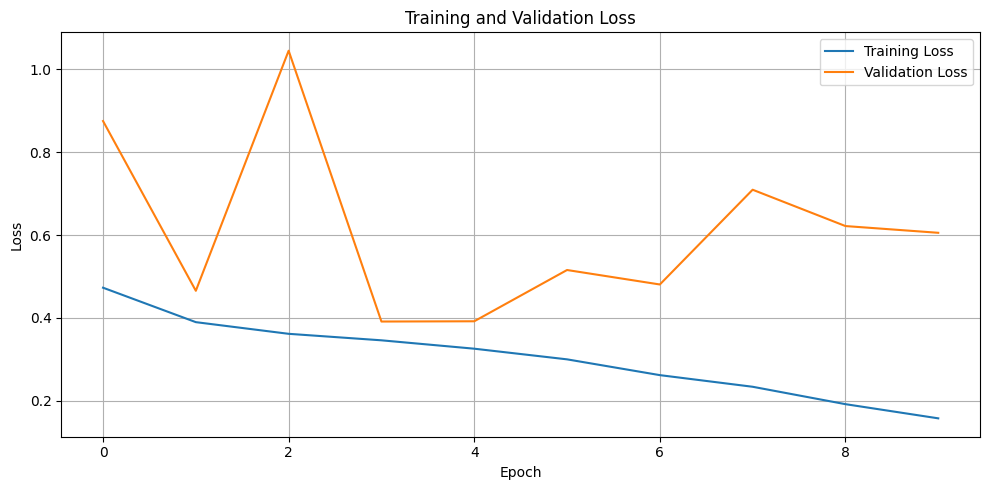

Test Loss: 0.6222
Test Accuracy: 81.20%


In [ ]:
# cell 4 or try this one
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming the previous code for MalariaClassifier, MalariaDataset, and data loaders is already defined

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    """
    Train the model and track training and validation metrics

    Args:
        model (nn.Module): Neural network model
        train_loader (DataLoader): Training data loader
        val_loader (DataLoader): Validation data loader
        criterion (nn.Module): Loss function
        optimizer (torch.optim.Optimizer): Optimization algorithm
        num_epochs (int): Number of training epochs

    Returns:
        tuple: Training and validation loss histories
    """
    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Track training metrics
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Compute average training loss for the epoch
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure inputs have the right shape (add channel dimension if needed)
                if inputs.dim() == 3:
                    inputs = inputs.unsqueeze(1)

                # Ensure inputs have 3 channels
                if inputs.size(1) == 1:
                    inputs = inputs.repeat(1, 3, 1, 1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

        # Compute average validation loss for the epoch
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Print epoch summary
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}\n')

    return train_losses, val_losses

def plot_training_curves(train_losses, val_losses):
    """
    Plot training and validation loss curves

    Args:
        train_losses (list): Training losses per epoch
        val_losses (list): Validation losses per epoch
    """
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Instantiate the model
model = MalariaClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
train_losses, val_losses = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs=10
)

# Plot training curves
plot_training_curves(train_losses, val_losses)

# Optional: Evaluate on test set
def evaluate_model(model, test_loader, criterion):
    """
    Evaluate the model on the test set

    Args:
        model (nn.Module): Trained neural network model
        test_loader (DataLoader): Test data loader
        criterion (nn.Module): Loss function

    Returns:
        tuple: Average test loss and accuracy
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    total_loss = 0.0
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total_samples

    print(f'Test Loss: {avg_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')

    return avg_loss, accuracy

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

Epoch [1/20]
Training Loss: 0.5294
Validation Loss: 0.4648
Current Learning Rate: 0.000010

Validation loss decreased (inf --> 0.464774).  Saving model ...
Epoch [2/20]
Training Loss: 0.4385
Validation Loss: 0.4430
Current Learning Rate: 0.000010

Validation loss decreased (0.464774 --> 0.443007).  Saving model ...
Epoch [3/20]
Training Loss: 0.4009
Validation Loss: 0.4244
Current Learning Rate: 0.000010

Validation loss decreased (0.443007 --> 0.424381).  Saving model ...
Epoch [4/20]
Training Loss: 0.3725
Validation Loss: 0.4058
Current Learning Rate: 0.000010

Validation loss decreased (0.424381 --> 0.405850).  Saving model ...
Epoch [5/20]
Training Loss: 0.3488
Validation Loss: 0.4141
Current Learning Rate: 0.000010

EarlyStopping counter: 1 out of 5
Epoch [6/20]
Training Loss: 0.3309
Validation Loss: 0.4087
Current Learning Rate: 0.000008

EarlyStopping counter: 2 out of 5
Epoch [7/20]
Training Loss: 0.3074
Validation Loss: 0.4181
Current Learning Rate: 0.000008

EarlyStopping cou

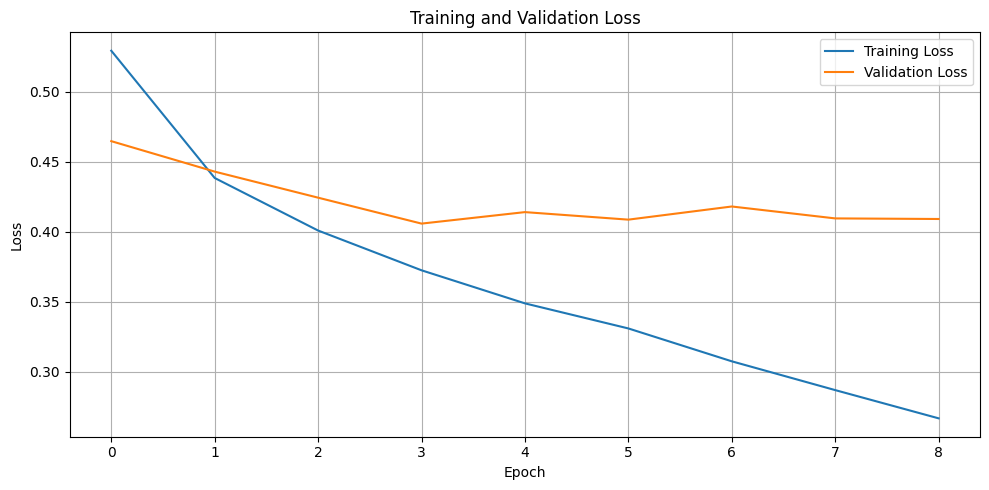

Test Loss: 0.4086
Test Accuracy: 80.91%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import copy

class EarlyStopping:
    """
    Early stops the training if validation loss doesn't improve after a given patience
    """
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.best_model = None

    def __call__(self, val_loss, model):
        """
        Check if training should stop

        Args:
            val_loss (float): Current validation loss
            model (nn.Module): Current model state
        """
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """
        Saves model when validation loss decrease.

        Args:
            val_loss (float): Current validation loss
            model (nn.Module): Current model state
        """
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')

        # Deep copy the model
        self.best_model = copy.deepcopy(model)
        self.val_loss_min = val_loss

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50):
    """
    Train the model with learning rate scheduling and early stopping

    Args:
        model (nn.Module): Neural network model
        train_loader (DataLoader): Training data loader
        val_loader (DataLoader): Validation data loader
        criterion (nn.Module): Loss function
        optimizer (torch.optim.Optimizer): Optimization algorithm
        scheduler (torch.optim.lr_scheduler): Learning rate scheduler
        num_epochs (int): Maximum number of training epochs

    Returns:
        tuple: Training and validation loss histories, best model
    """
    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Initialize Early Stopping
    early_stopping = EarlyStopping(patience=5, verbose=True)

    # Track training metrics
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        # Compute average training loss for the epoch
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure inputs have the right shape (add channel dimension if needed)
                if inputs.dim() == 3:
                    inputs = inputs.unsqueeze(1)

                # Ensure inputs have 3 channels
                if inputs.size(1) == 1:
                    inputs = inputs.repeat(1, 3, 1, 1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

        # Compute average validation loss for the epoch
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Learning rate scheduling
        scheduler.step(avg_val_loss)

        # Print epoch summary
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')
        print(f'Current Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}\n')

        # Early Stopping
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    # Return the best model found during training
    return train_losses, val_losses, early_stopping.best_model

def plot_training_curves(train_losses, val_losses):
    """
    Plot training and validation loss curves

    Args:
        train_losses (list): Training losses per epoch
        val_losses (list): Validation losses per epoch
    """
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Instantiate the model
model = MalariaClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Create learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',   # Look for minimum validation loss
    factor=0.75,   # Reduce learning rate by half
    patience=1,   # Wait 3 epochs with no improvement
    verbose=True, # Print when learning rate changes
    min_lr=1e-7   # Minimum learning rate
)

# Train the model
train_losses, val_losses, best_model = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    num_epochs=20  # Increased to allow more room for early stopping
)

# Plot training curves
plot_training_curves(train_losses, val_losses)

# Evaluate on test set using the best model
def evaluate_model(model, test_loader, criterion):
    """
    Evaluate the model on the test set

    Args:
        model (nn.Module): Trained neural network model
        test_loader (DataLoader): Test data loader
        criterion (nn.Module): Loss function

    Returns:
        tuple: Average test loss and accuracy
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    total_loss = 0.0
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total_samples

    print(f'Test Loss: {avg_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')

    return avg_loss, accuracy

# Evaluate on test set using the best model
test_loss, test_accuracy = evaluate_model(best_model, test_loader, criterion)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50):
    """
    Train the model and track training and validation metrics with learning rate scheduling and accuracy

    Args:
        model (nn.Module): Neural network model
        train_loader (DataLoader): Training data loader
        val_loader (DataLoader): Validation data loader
        criterion (nn.Module): Loss function
        optimizer (torch.optim.Optimizer): Optimization algorithm
        scheduler (torch.optim.lr_scheduler): Learning rate scheduler
        num_epochs (int): Number of training epochs

    Returns:
        tuple: Training and validation losses, accuracies, and learning rates
    """
    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Track training metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    learning_rates = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        train_correct = 0
        train_total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            epoch_train_loss += loss.item()

        # Compute average training loss and accuracy for the epoch
        avg_train_loss = epoch_train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure inputs have the right shape (add channel dimension if needed)
                if inputs.dim() == 3:
                    inputs = inputs.unsqueeze(1)

                # Ensure inputs have 3 channels
                if inputs.size(1) == 1:
                    inputs = inputs.repeat(1, 3, 1, 1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

                # Compute validation accuracy
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Compute average validation loss and accuracy for the epoch
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        # Step the learning rate scheduler based on validation loss
        scheduler.step(avg_val_loss)

        # Get current learning rate
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)

        # Print epoch summary
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')
        print(f'Learning Rate: {current_lr:.6f}\n')

    return train_losses, val_losses, train_accuracies, val_accuracies, learning_rates

def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates):
    """
    Plot training and validation loss and accuracy curves along with learning rate

    Args:
        train_losses (list): Training losses per epoch
        val_losses (list): Validation losses per epoch
        train_accuracies (list): Training accuracies per epoch
        val_accuracies (list): Validation accuracies per epoch
        learning_rates (list): Learning rates per epoch
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Loss plot
    axs[0].plot(train_losses, label='Training Loss')
    axs[0].plot(val_losses, label='Validation Loss')
    axs[0].set_title('Training and Validation Loss')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # Accuracy plot
    axs[1].plot(train_accuracies, label='Training Accuracy')
    axs[1].plot(val_accuracies, label='Validation Accuracy')
    axs[1].set_title('Training and Validation Accuracy')
    axs[1].set_ylabel('Accuracy (%)')
    axs[1].legend()
    axs[1].grid(True)

    # Learning rate plot
    axs[2].plot(learning_rates, label='Learning Rate', color='green')
    axs[2].set_title('Learning Rate')
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Learning Rate')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

# Instantiate the model
model = MalariaClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Create learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',     # Reduce LR when metric has stopped improving
    factor=0.75,     # Reduce learning rate by half
    patience=2,     # Number of epochs with no improvement after which LR will be reduced
    verbose=True    # Print a message to stdout when the LR changes
)

# Train the model
train_losses, val_losses, train_accuracies, val_accuracies, learning_rates = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    num_epochs=50
)
# Plot training curves including loss, accuracy, and learning rate
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates)

# Optional: Evaluate on test set
def evaluate_model(model, test_loader, criterion):
    """
    Evaluate the model on the test set

    Args:
        model (nn.Module): Trained neural network model
        test_loader (DataLoader): Test data loader
        criterion (nn.Module): Loss function

    Returns:
        tuple: Average test loss and accuracy
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    total_loss = 0.0
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total_samples

    print(f'Test Loss: {avg_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')

    return avg_loss, accuracy
    # Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)


NameError: name 'MalariaClassifier' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.models import efficientnet_b3
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
import matplotlib.pyplot as plt

# Define the MalariaClassifier model
class MalariaClassifier(nn.Module):
    def __init__(self, dropout_rate=0.5, use_mixup=False):
        """
        Enhanced Malaria Classifier with multiple architectural improvements.

        Args:
            dropout_rate (float): Dropout probability.
            use_mixup (bool): Whether to use mixup during training.
        """
        super(MalariaClassifier, self).__init__()

        # Use EfficientNet-B3 as the feature extractor
        base_model = efficientnet_b3(pretrained=True)
        self.feature_extractor = nn.Sequential(
            base_model.features,
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten()
        )

        # Partially unfreeze later layers for fine-tuning
        for name, param in base_model.features.named_parameters():
            if 'blocks.5' in name or 'blocks.6' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        # Calculate feature output size
        dummy_input = torch.randn(1, 3, 128, 128)
        features_output_size = self.feature_extractor(dummy_input).shape[1]

        # Enhanced classification head with residual connections
        self.classifier = nn.ModuleList([
            nn.Sequential(
                nn.BatchNorm1d(features_output_size),
                nn.Linear(features_output_size, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate)
            ),
            nn.Sequential(
                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate)
            ),
            nn.Linear(256, 2)
        ])

        self.label_smoothing = 0.1

    def forward(self, x):
        features = self.feature_extractor(x)
        x = self.classifier[0](features)
        residual = x
        x = self.classifier[1](x)
        x += residual  # Residual connection
        x = self.classifier[2](x)
        return x

    def mixup_criterion(self, pred, y_a, y_b, lam):
        """
        Custom loss function for mixup augmentation.

        Args:
            pred (torch.Tensor): Model predictions.
            y_a (torch.Tensor): First set of labels.
            y_b (torch.Tensor): Second set of labels.
            lam (float): Mixing lambda.

        Returns:
            torch.Tensor: Mixup loss.
        """
        criterion = nn.CrossEntropyLoss(label_smoothing=self.label_smoothing)
        return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Mixup augmentation function
def mixup_data(x, y, alpha=1.0):
    """
    Implements mixup data augmentation.

    Args:
        x (torch.Tensor): Input images.
        y (torch.Tensor): Labels.
        alpha (float): Mixup hyperparameter.

    Returns:
        tuple: Mixed inputs, labels, and mixing coefficient.
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, use_mixup=False):
    """
    Enhanced training loop with mixup and other augmentations.

    Args:
        model (nn.Module): Neural network model.
        train_loader (DataLoader): Training data loader.
        val_loader (DataLoader): Validation data loader.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer.
        scheduler (torch.optim.lr_scheduler): Learning rate scheduler.
        num_epochs (int): Number of epochs.
        use_mixup (bool): Whether to use mixup augmentation.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    learning_rates = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss, train_correct, train_total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            if use_mixup:
                inputs, y_a, y_b, lam = mixup_data(inputs, labels)

            optimizer.zero_grad()
            outputs = model(inputs)

            if use_mixup:
                loss = model.mixup_criterion(outputs, y_a, y_b, lam)
            else:
                loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()
        epoch_val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        scheduler.step(avg_val_loss)
        learning_rates.append(optimizer.param_groups[0]['lr'])

        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies, learning_rates

# Plot training curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates):
    """
    Plot training and validation loss, accuracy, and learning rate curves.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    axs[0].plot(train_losses, label='Training Loss')
    axs[0].plot(val_losses, label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].legend()

    axs[1].plot(train_accuracies, label='Training Accuracy')
    axs[1].plot(val_accuracies, label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].legend()

    axs[2].plot(learning_rates, label='Learning Rate', color='green')
    axs[2].set_title('Learning Rate')
    axs[2].legend()

    plt.show()
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.models import efficientnet_b3
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
import matplotlib.pyplot as plt

# Define the MalariaClassifier model
class MalariaClassifier(nn.Module):
    def __init__(self, dropout_rate=0.5, use_mixup=False):
        """
        Enhanced Malaria Classifier with multiple architectural improvements.

        Args:
            dropout_rate (float): Dropout probability.
            use_mixup (bool): Whether to use mixup during training.
        """
        super(MalariaClassifier, self).__init__()

        # Use EfficientNet-B3 as the feature extractor
        base_model = efficientnet_b3(pretrained=True)
        self.feature_extractor = nn.Sequential(
            base_model.features,
            nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
            nn.Flatten()
        )

        # Partially unfreeze later layers for fine-tuning
        for name, param in base_model.features.named_parameters():
            if 'blocks.5' in name or 'blocks.6' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        # Calculate feature output size
        dummy_input = torch.randn(1, 3, 128, 128)
        features_output_size = self.feature_extractor(dummy_input).shape[1]

        # Enhanced classification head with residual connections
        self.classifier = nn.ModuleList([
            nn.Sequential(
                nn.BatchNorm1d(features_output_size),
                nn.Linear(features_output_size, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate)
            ),
            nn.Sequential(
                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate)
            ),
            nn.Linear(256, 2)
        ])

        self.label_smoothing = 0.1

    def forward(self, x):
        features = self.feature_extractor(x)
        x = self.classifier[0](features)
        residual = x
        x = self.classifier[1](x)
        x += residual  # Residual connection
        x = self.classifier[2](x)
        return x

    def mixup_criterion(self, pred, y_a, y_b, lam):
        """
        Custom loss function for mixup augmentation.

        Args:
            pred (torch.Tensor): Model predictions.
            y_a (torch.Tensor): First set of labels.
            y_b (torch.Tensor): Second set of labels.
            lam (float): Mixing lambda.

        Returns:
            torch.Tensor: Mixup loss.
        """
        criterion = nn.CrossEntropyLoss(label_smoothing=self.label_smoothing)
        return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Mixup augmentation function
def mixup_data(x, y, alpha=1.0):
    """
    Implements mixup data augmentation.

    Args:
        x (torch.Tensor): Input images.
        y (torch.Tensor): Labels.
        alpha (float): Mixup hyperparameter.

    Returns:
        tuple: Mixed inputs, labels, and mixing coefficient.
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20, use_mixup=False):
    """
    Enhanced training loop with mixup and other augmentations.

    Args:
        model (nn.Module): Neural network model.
        train_loader (DataLoader): Training data loader.
        val_loader (DataLoader): Validation data loader.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer.
        scheduler (torch.optim.lr_scheduler): Learning rate scheduler.
        num_epochs (int): Number of epochs.
        use_mixup (bool): Whether to use mixup augmentation.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    learning_rates = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss, train_correct, train_total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            if use_mixup:
                inputs, y_a, y_b, lam = mixup_data(inputs, labels)

            optimizer.zero_grad()
            outputs = model(inputs)

            if use_mixup:
                loss = model.mixup_criterion(outputs, y_a, y_b, lam)
            else:
                loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        model.eval()
        epoch_val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_accuracy = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        scheduler.step(avg_val_loss)
        learning_rates.append(optimizer.param_groups[0]['lr'])

        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')
        print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies, learning_rates

# Plot training curves
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates):
    """
    Plot training and validation loss, accuracy, and learning rate curves.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    axs[0].plot(train_losses, label='Training Loss')
    axs[0].plot(val_losses, label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].legend()

    axs[1].plot(train_accuracies, label='Training Accuracy')
    axs[1].plot(val_accuracies, label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].legend()

    axs[2].plot(learning_rates, label='Learning Rate', color='green')
    axs[2].set_title('Learning Rate')
    axs[2].legend()

    plt.show()


In [ ]:
# Plot training curves including loss, accuracy, and learning rate
# Instantiate the model
model = MalariaClassifier()

# Define loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-3)  # Example optimizer
scheduler = ReduceLROnPlateau(optimizer, patience=3, factor=0.5, verbose=True)

# Train the model and get training history
train_losses, val_losses, train_accuracies, val_accuracies, learning_rates = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20
)

# Now you can plot the curves
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates)
plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies, learning_rates)

# Optional: Evaluate on test set
def evaluate_model(model, test_loader, criterion):
    """
    Evaluate the model on the test set

    Args:
        model (nn.Module): Trained neural network model
        test_loader (DataLoader): Test data loader
        criterion (nn.Module): Loss function

    Returns:
        tuple: Average test loss and accuracy
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    total_loss = 0.0
    correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure inputs have the right shape (add channel dimension if needed)
            if inputs.dim() == 3:
                inputs = inputs.unsqueeze(1)

            # Ensure inputs have 3 channels
            if inputs.size(1) == 1:
                inputs = inputs.repeat(1, 3, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Compute accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total_samples

    print(f'Test Loss: {avg_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.2f}%')

    return avg_loss, accuracy

# Evaluate on test set
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 120MB/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr

RuntimeError: Given groups=1, weight of size [40, 3, 3, 3], expected input[32, 1, 128, 128] to have 3 channels, but got 1 channels instead